# Radial basis function network (RBFN) homework.

## Solved by: Jan Zahn, Jonas Meier, Thomas Wiktorin

In this homework you will implement from scratch your RBF-network using only numpy. This implementation will use gaussian kernel functions and the pseudo-inverse for linear regression.

## RBFN basic theory

Explain why is the pseudo-inverse used to linear regression in the RBFN network.

To calculate the output of a RBFN we use the dot product of the interpolation matrix and the weights. While training the output is given and the weights need to be adjusted. To calculate the weights, we now have to use the dot product of the pseudo-inverse of the interpolation matrix and the given output.

## RBFN implementation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class RBFN(object):

    def __init__(self, hidden_dimension, sigma=1.0):
        """ Radial basis function network (RBFN)
        # Arguments
            hidden_dimension: Integer indicating number of
                radial basis functions
            sigma: Float indicating the precision of the Gaussian.
        """
        self.hidden_dimension = hidden_dimension
        self.sigma = sigma
        self.centers = None
        self.weights = None

    def _kernel_function(self, center, data_point):
        """ Calculates the similarity/kernel function between
        the selected/constructed centers and the samples.
        # Arguments:
            center: numpy array of shape(, feature_dimension)
            data_points: numpy array of shape (, feature_dimension)
        # Returns:
            kernel_value: Float entry for the interpolation matrix.
        """
        kernel_value = np.exp(-(np.linalg.norm(data_point-center) ** 2 / self.sigma ** 2))
        return kernel_value

    def _calculate_interpolation_matrix(self, X):
        """ Calculates interpolation matrix using a kernel_function
        # Arguments
            X: numpy array of features
                with shape (num_samples, feature_dimension)
        # Returns
            G: Numpy array of the interpolation matrix with
                shape (num_samples, hidden_dimensions)
        """
        interpolation_matrix = np.zeros((X.shape[0], self.hidden_dimension), float)
        for ci, c in enumerate(self.centers):
            for xi, x in enumerate(X):
                interpolation_matrix[xi,ci] = self._kernel_function(c, x)
        return interpolation_matrix

    def _select_centers(self, X):
        """ Selects/creates centers from features.
        # Arguments:
            X: numpy array containing features of
                shape (num_samples, feature_dimension)
        # Returns:
            centers: numpy array containing feature centers
                of shape (hidden_dimension, feature_dimension)
        """
        random_rows = np.random.randint(X.shape[0], size=self.hidden_dimension)
        centers = X[random_rows,]
        return centers

    def fit(self, X, Y):
        """ Fits weights using linear regression
        # Arguments
            X: numpy array containing features of
                shape (num_samples, feature_dimension)
            Y: numpy array containing the targets
                of shape (num_samples, feature_dimension)
        """
        # select centers randomly from X
        self.centers = self._select_centers(X)
        
        # calculate interpolation matrix 
        interpolation_matrix = self._calculate_interpolation_matrix(X)
        
        # train, adjust weights
        self.weights = np.dot(np.linalg.pinv(interpolation_matrix), Y)

    def predict(self, X):
        """
        # Arguments
            X: numpy array of features
                of shape (num_samples, feature_dimension)
        # Returns:
            predictions: numpy array of shape (num_samples, )
        """
        # calculate interpolation matrix 
        interpolation_matrix = self._calculate_interpolation_matrix(X)
        
        Y = np.dot(interpolation_matrix, self.weights)
        return Y

Now apply your RBF-network implementation to two interpolation problems in 1D and 2D.

## RBFN 1D interpolation example

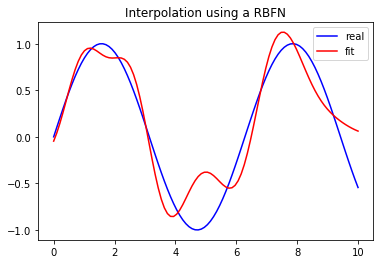

In [3]:
x = np.linspace(0, 10, 100)
y = np.sin(x)
model = RBFN(hidden_dimension=10, sigma=1.)
model.fit(x, y)
y_pred = model.predict(x)

plt.plot(x, y, 'b-', label='real')
plt.plot(x, y_pred, 'r-', label='fit')
plt.legend(loc='upper right')
plt.title('Interpolation using a RBFN')
plt.show()

Measure the error of the interpolation using mean squared error as you increase the hidden shape and as you vary the sigma

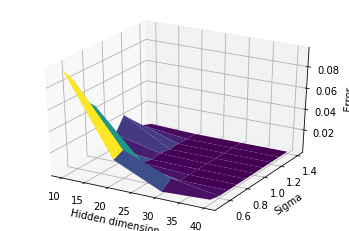

In [4]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

def calc_error(x, y, hidden_dim, sig):
    model = RBFN(hidden_dimension=hidden_dim, sigma=sig)
    model.fit(x, y)
    y_pred = model.predict(x)
    error = ((y - y_pred) ** 2).mean(axis=None)
    return error

x = np.linspace(0, 10, 100)
y = np.sin(x)

array_hidden_dimension = np.arange(10, 50, 10)
array_sigma = np.arange(0.5, 1.5, 0.1)
array_error = np.empty((array_sigma.shape[0],array_hidden_dimension.shape[0]))
hidden_dim, sigma = np.meshgrid(array_hidden_dimension, array_sigma)
for row_id, row in enumerate(hidden_dim):
    for column_id, element in enumerate(row):
        array_error[row_id, column_id] = calc_error(x, y, element, sigma[row_id, column_id])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Hidden dimension')
ax.set_ylabel('Sigma')
ax.set_zlabel('Error')
ax.plot_surface(hidden_dim, sigma, array_error, cmap='viridis',
                       linewidth=0, antialiased=True)

Increasing the hidden dimension and sigma to some extent reduces the error. The hidden dimension seems to be more important in this case.

## RBFN 2D interpolation example

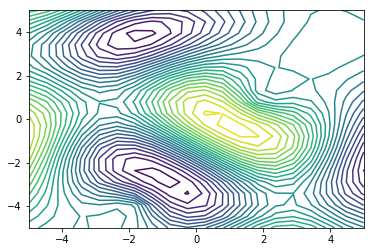

In [5]:
x = np.linspace(-5, 5, 20)
y = np.linspace(-5, 5, 20)
x, y = np.meshgrid(x, y)
z1 = np.sin(np.sqrt((x - 2.)**2 + (y - 1)**2))
z2 = np.sin(np.sqrt((x + 2.)**2 + (y + 4)**2))
z = (z1 - z2) / 2.
figure = plt.figure()
axis = plt.axes()
axis.contour(x, y, z, levels=25)
plt.show()

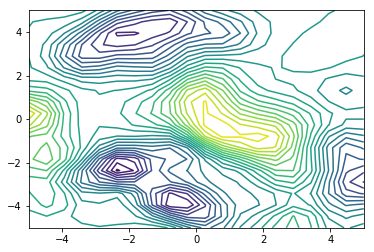

In [6]:
features = np.asarray(list(zip(x.flatten().tolist(), y.flatten().tolist())))
targets = z.flatten()
model = RBFN(hidden_dimension=70, sigma=1.)
model.fit(features, targets)
predictions = model.predict(features)
figure = plt.figure()
axis = plt.axes()
axis.contour(x, y, predictions.reshape(20, 20), levels=25)
plt.show()

Measure the error of the interpolation using mean squared error as you increase the hidden shape and as you vary the sigma

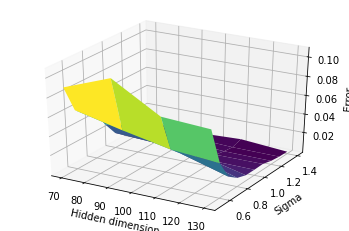

In [7]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

def calc_error(features, targets, hidden_dim, sig):
    model = RBFN(hidden_dimension=hidden_dim, sigma=sig)
    model.fit(features, targets)
    predictions = model.predict(features)
    error = ((targets - predictions) ** 2).mean(axis=None)
    return error

x = np.linspace(-5, 5, 20)
y = np.linspace(-5, 5, 20)
x, y = np.meshgrid(x, y)
z1 = np.sin(np.sqrt((x - 2.)**2 + (y - 1)**2))
z2 = np.sin(np.sqrt((x + 2.)**2 + (y + 4)**2))
z = (z1 - z2) / 2.

features = np.asarray(list(zip(x.flatten().tolist(), y.flatten().tolist())))
targets = z.flatten()

array_hidden_dimension = np.arange(70, 140, 20)
array_sigma = np.arange(0.5, 1.5, 0.1)
array_error = np.empty((array_sigma.shape[0],array_hidden_dimension.shape[0]))
hidden_dim, sigma = np.meshgrid(array_hidden_dimension, array_sigma)
for row_id, row in enumerate(hidden_dim):
    for column_id, element in enumerate(row):
        array_error[row_id, column_id] = calc_error(features, targets, element, sigma[row_id, column_id])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Hidden dimension')
ax.set_ylabel('Sigma')
ax.set_zlabel('Error')
ax.plot_surface(hidden_dim, sigma, array_error, cmap='viridis',
                       linewidth=0, antialiased=True)

Increasing the hidden dimension and sigma to some extent reduces the error. Sigma seems to be more important in this case.